# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

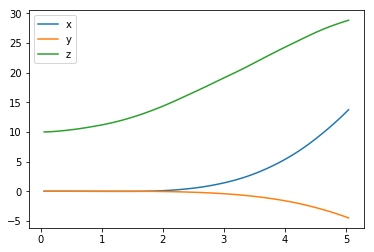

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

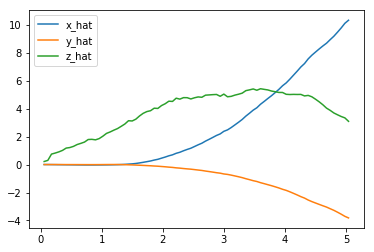

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

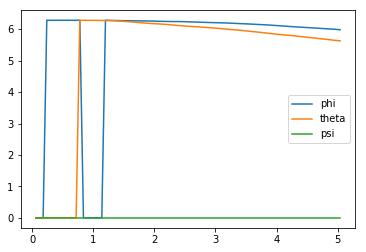

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

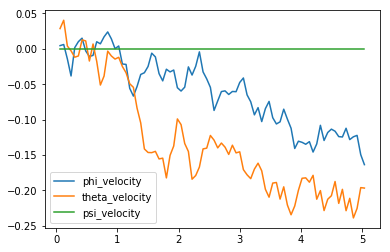

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

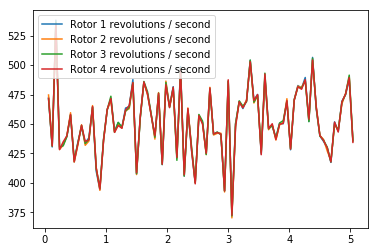

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[13.75315586 -4.50125276 28.85663678  5.98242771  5.62751128  0.        ]
[10.3170416  -3.81650402  3.08937645]
[-0.16375486 -0.1968965   0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.052 (best =   0.083), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [33]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task
import numpy as np

# training function
def run(agent, task, num_episodes=1000, print_every=10):
    """Run agent in given reinforcement learning environment and return scores."""
    scores = []
    time_used = []
    heights = []
    best_score = -sys.maxsize
    max_height = -sys.maxsize
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        score = 0
        height = 0
        while True:
            action = agent.act(state) 
            #print(action)
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state
            score += reward
            best_score = max(best_score , score)
            max_height = max(max_height, task.sim.pose[2])
            if done:
                scores.append(score)
                heights.append(max_height)
                time_used.append(task.sim.time)
                if i_episode % print_every == 0:
                    print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), max height = {:7.3f}, flight time = {:7.3f}, ".format(
                        i_episode, score, best_score, max_height, task.sim.time), end="")  # [debug]
                break
        sys.stdout.flush()
    return scores, time_used, heights



# target
target_height = 50
runtime = 5


# starting pose
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities




# setup and run
num_episodes = 1500
task = Task(init_pose, init_velocities, init_angle_velocities, target_height=target_height, runtime=runtime)
agent = DDPG(task) 
scores, time_used, heights = run(agent, task, num_episodes, 1)




Episode = 1500, score = 122.886 (best = 127.120), max height =  27.503, flight time =   5.020, 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

I run the task for 1500 episodes, however it seems like all the progress and learning was done during the first couple of hundred episodes. The plots are flat from episode 200 to episode 1500, I'm only showing the first parts below. 


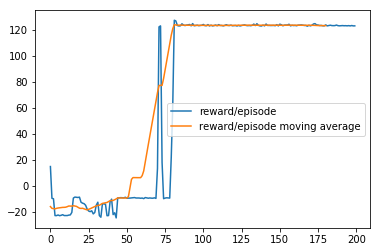

In [46]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

n = 20
moving_avg_score = np.convolve(scores[:200], np.ones((n,))/n, mode='valid')
plt.plot( scores[:200], label='reward/episode')
plt.plot( moving_avg_score, label='reward/episode moving average')
plt.legend()
_ = plt.ylim()

### Flight time achieved

One part of the reward is related to how long the quadcopter is able to fly without falling out of the allowed area. Below I plot the time achieved for each episode (5 is the max given the input parameter 'runtime' above)

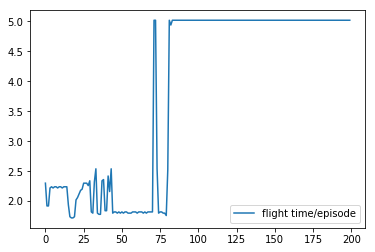

In [47]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot( time_used[:200], label='flight time/episode')
plt.legend()
_ = plt.ylim()

### Height achieved

Another aspect of the reward is to get as high as possible (target height is set to 100). The quadcopter reaches a max height of 27.5 after a while, but not getting higher than that. This is probably how high the quadcopter is able to get given the runtime of '5' and restrictions regarding max and min rotor speeds.

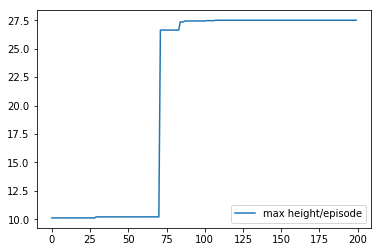

In [49]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot( heights[:200], label='max height/episode')
plt.legend()
_ = plt.ylim()

## Trying to fly the quadcopter

In this section we'll plot a flight trial using the learned agent.

In [44]:
# show how the quadcopter flies
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2


# Setup
task.reset()
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
state = agent.reset_episode()
while True:
    rotor_speeds = agent.act(state)
    _, _, done = task.step(rotor_speeds)
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
    for ii in range(len(labels)):
        results[labels[ii]].append(to_write[ii])
    if done:
        print("DONE")
        break



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
DONE


### XYZ positions

We see that quadcopter goes upward, while at the same time drifting off (randomly) in the x and y dimensions.

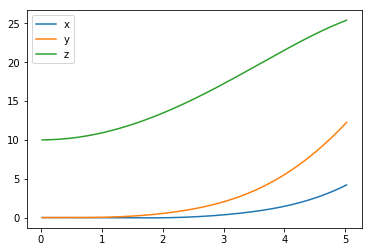

In [51]:
# show how the quadcopter flies


plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

### Rotor speeds

The rotor speeds actually varies alot, which I attribute to the fact that the agent has in fact learned to stabilize and go upwards by adjusting each individual rotor.

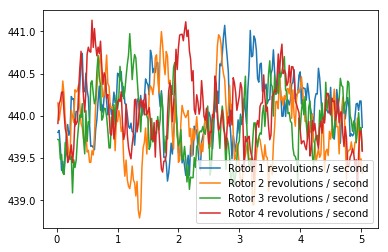

In [53]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

In order to help the agent learn to fly stable (and not crashing/falling down), I narrowed the allowed ranges for the rotor speed in the Task class:

```python
     self.action_low = 402
     self.action_high = 440
```

After trying a bit with the provided reward function (distance from a target position), I ended up with a reward consisting of three parts:
* getting as high as possible 
* keeping the four rotor speeds as similar as possible (to keep the quadcopter stable and not falling down)
* keeping the quadcopter flying as long as possible

The first and last part always has a value between 0 and 1, and the second I scaled to a value near 1 for most cases (and 0 if all rotor has the same speed).

The compound reward is calculating by giving a weight to each part.

```python
    def get_reward(self):
        height_reward = (self.target_height - self.sim.pose[2]) / self.target_height
        prop_speed_difference = - np.std(self.current_speeds) / 10
        flight_time = self.sim.runtime / self.runtime
        
        reward = 0.4 * prop_speed_difference + \
               0.3 * flight_time + \
               0.3 * height_reward
        return reward
```

I found it hard to get the quadcopter to fly as it tended to loose balance and fall out of the sky. I therefore gave the target of having similar speeds on all four rotors the heightest weight (even though all these three rewards are related):

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:



I ended up using the Deep Deterministic Policy Gradients (with the classes/implementations of DDPG, Actor, Critic, ReplayBuffer, OUNoise provided in the Udacity project). 

I had an earlier attemt using QTableAgent with tile encoding as shown in "Lesson 8: RL in continous spaces". I had to severly restrict the environment (e.g. discritizing the actions to up/down/left/right/forward/backward by hard-coding a set of rotor speeds for each action). The agent was able to learn to go up, but given the restrictions it was not a good solution.


For the DDPG actor/critic algorithm, I tried different values for 'tau', but ended up with the provided value of 0.1 as I didn't get any better results while experimenting with lower values. For the other values I have kept the provided values.

For the actor I used this network architecture:
* Three hidden layers with 'relu' activation functions (sizes 32, 64 and 32)
* An output layer with a 'sigmoid' activation function

For the critic I used this network architecture:
* Two pathways for the actions and the states, each consiting of
 * Two hidden layers with 'relu' activation functions (sizes 32 and 64)
* Combine these two pathways and adding a 'relu' activation function
* An output layer without an activation function



**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

* Given the reward function and the DDPG algorithm this seems like it was quite easy to learn (it learned during the first 100 episodes), but there was a lot of trial and error with different reward functions and learning rates before I got here. For many cases in these experimentations the quadcopter was not able to stay flying for long, but fell out the sky and wouldn't learn.
* In this case it seems to be a jump in the learning curve, where the agent suddenly found a good solution (and one earlier spikes in the learning rate as well).
* For all episodes from 200 - 1500, the reward was stable around 120. The flying time was the full 5 'runtime' as well, and the quadcopter reached a height of about 27.5 in each case as well. So given the (rather simple) goal of going as high as possible (and not fall out the sky), the performance was not too bad. 

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The hardest part was to get a good understanding of the various learning algorithms for reinforcement learning. Also it took a good while to figure out the rules of the environment (e.g. that a height of 0 didn't mean floor or ground, but that the quadcopter would fall down and out of the allowed area).

Also finding a reward function that would teach a agent to keep a quadcopter flying was difficult.


It was more difficult than expected to get the quadcopter to fly at all, as for a long time I couldn't get any agent to learn to fly it for long. But I find it interesting that the final agent had so varied rotor speeds for the four rotors, given that I had a reward function related to the similarity of these four speeds, as well as the fact that the quadcopter is(/or expected to be) more stable without wildly variating rotor speeds. However, I have added some constraints to how far up and down these speeds could go.